In [9]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy

csv_file_path = 'subj1/jun_self.csv'
#csv_file_path = 'subj1/jun_assigned.csv'
val = []
aro = []
with open(csv_file_path) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            val.append(float(row[10]))
            aro.append(float(row[11]))
            line_count += 1
    print(f'Processed {line_count} lines.')
                    
#2913 lines (totally )

Column names are frames_ids, AU1, AU2, AU4, AU6, AU12, AU15, AU20, AU25, EXPR, valence, arousal
Processed 4073 lines.


In [10]:
import numpy as np
import colorsys
from colorsys import hls_to_rgb

def transfer_space(x, y):
    '''
    Input: coordinate of x, and y
    Output: Intensity and Angle
    '''
    vec = [x, y]
    intensity = np.sqrt(x*x + y*y)
    e_vec = np.array(vec) / intensity
    e_x = np.array([1,0])
    angle = np.arccos(np.dot(e_vec, e_x))
    if y < 0: #below the x axis
        angle = 2 * np.pi - angle
    norm_angle = angle / (np.pi * 2)  #0-1
    #print(norm_angle * 360)
    return intensity, norm_angle

def convert_color_vector(na):
    '''
    Input: Norm Angle
    Output: RGB value of the angle for plotting
    '''
    rgb = hls_to_rgb(na, 0.7, 0.7)
    #print(rgb)
    return rgb

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    #if x.ndim != 1:
    #    raise ValueError, "smooth only accepts 1 dimension arrays."

    #if x.size < window_len:
    #    raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x
    
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise(ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

-0.02514318110575089 0.30157878269952115


([], <a list of 0 Text major ticklabel objects>)

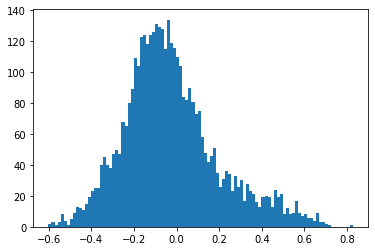

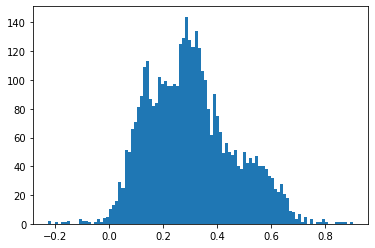

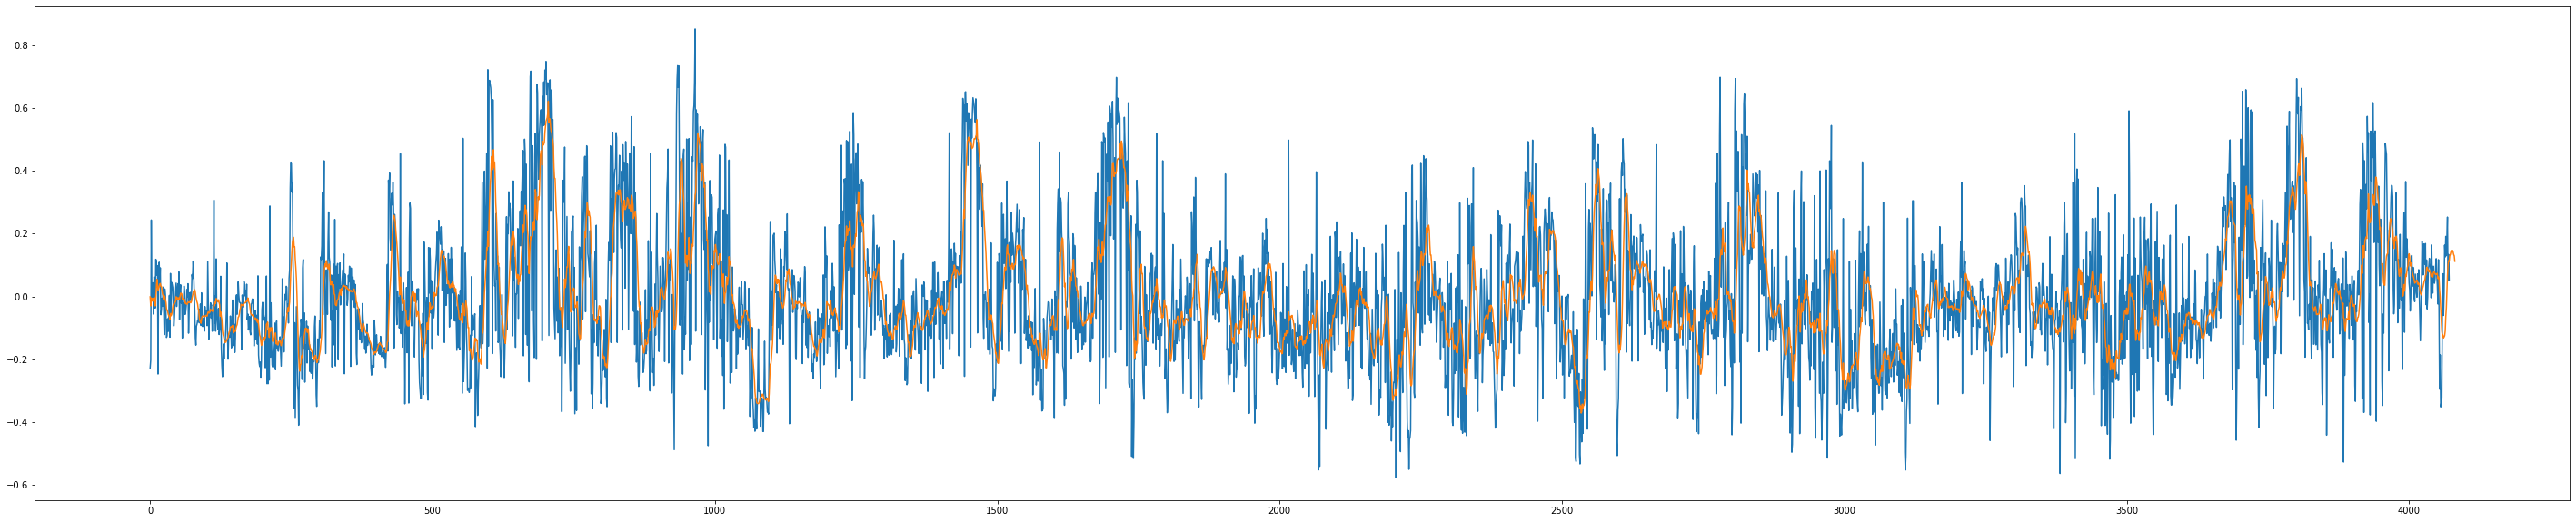

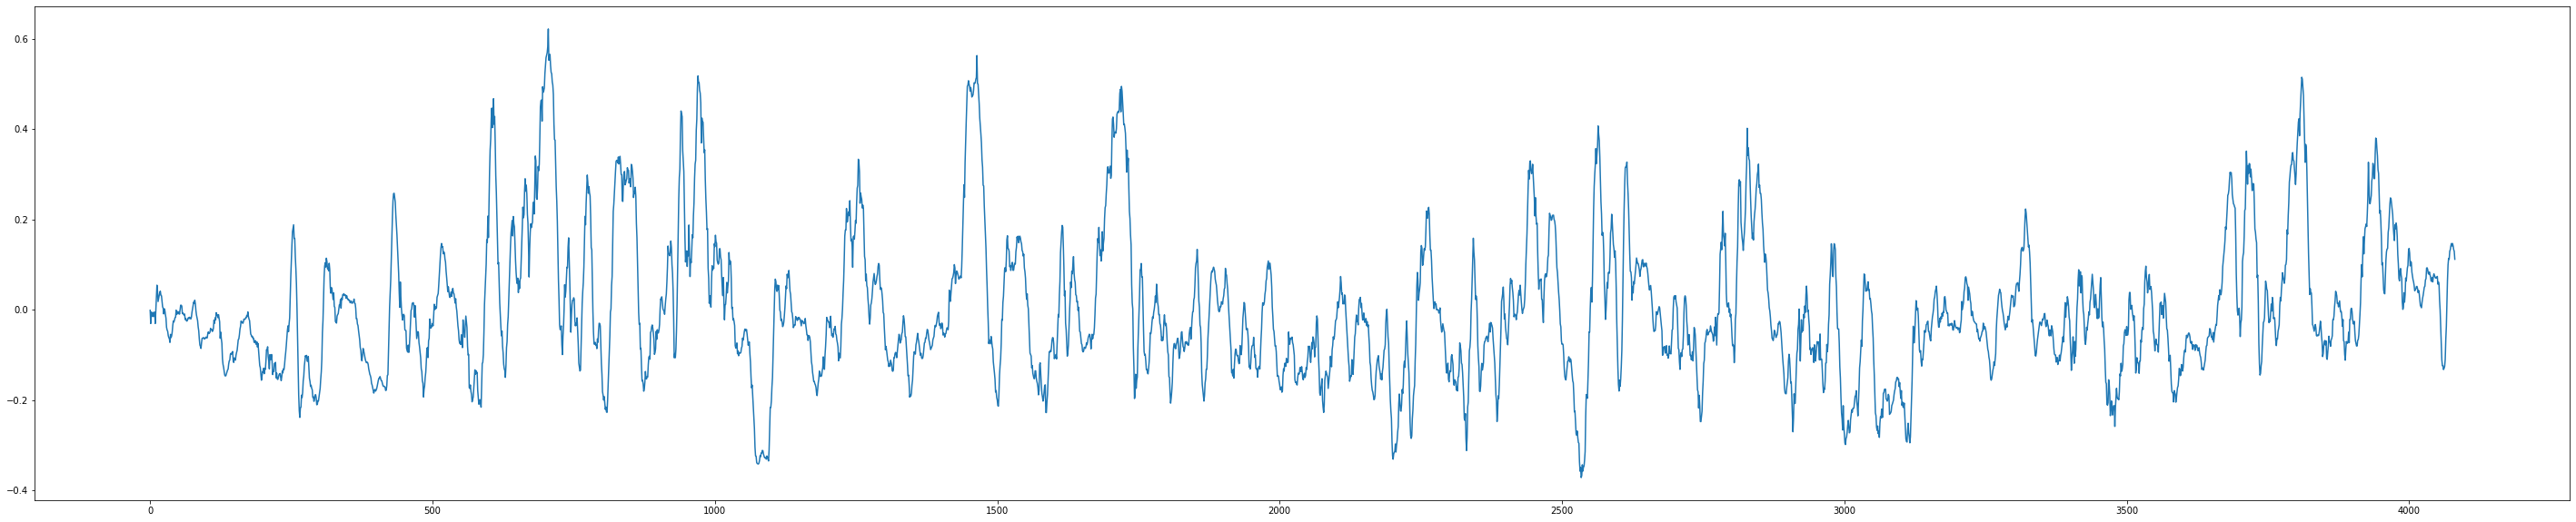

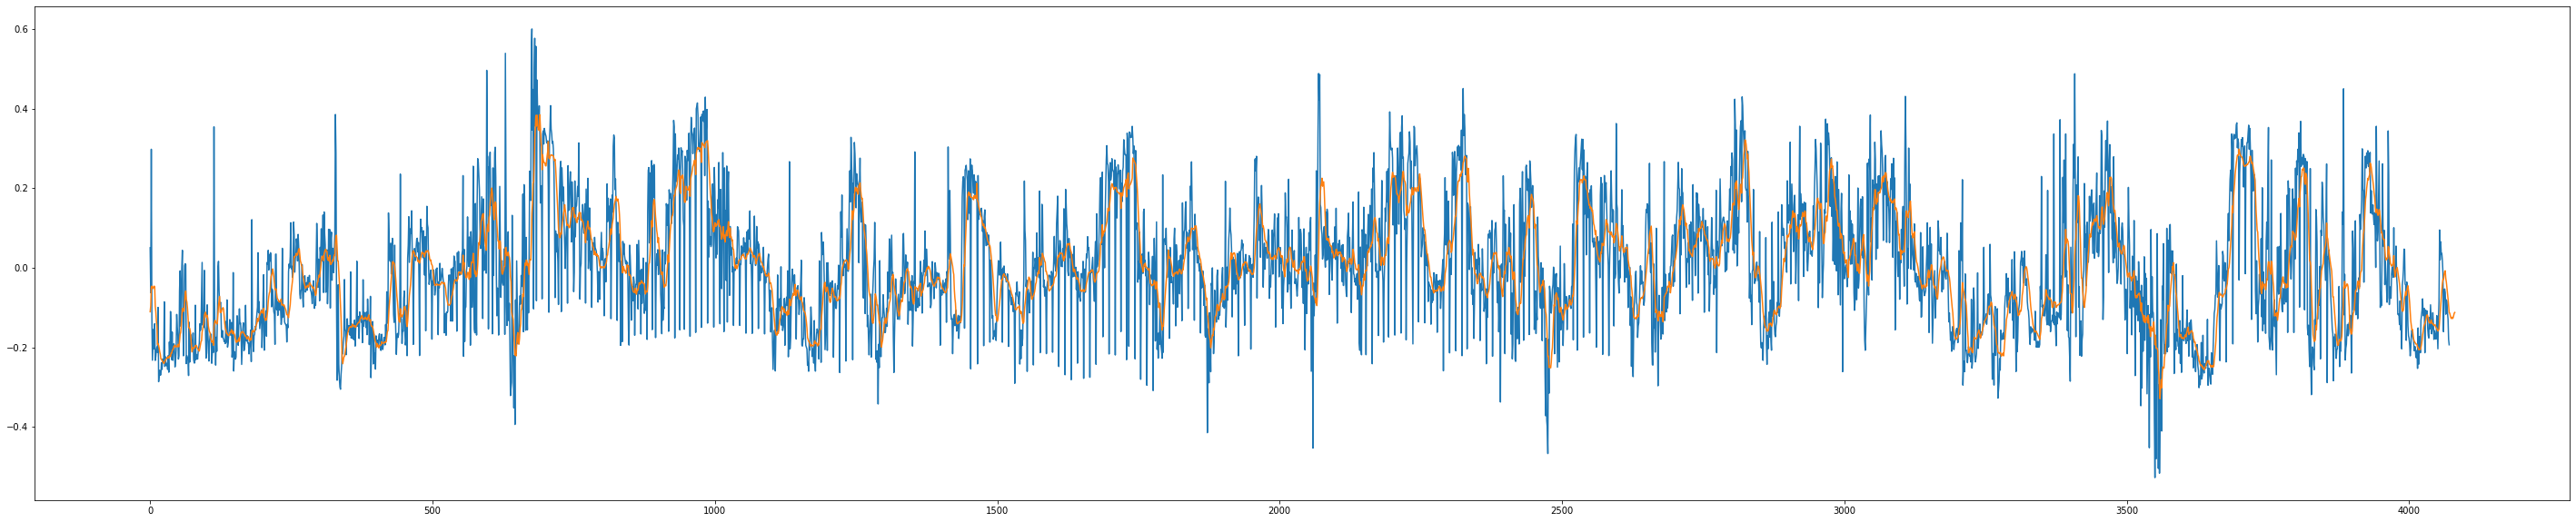

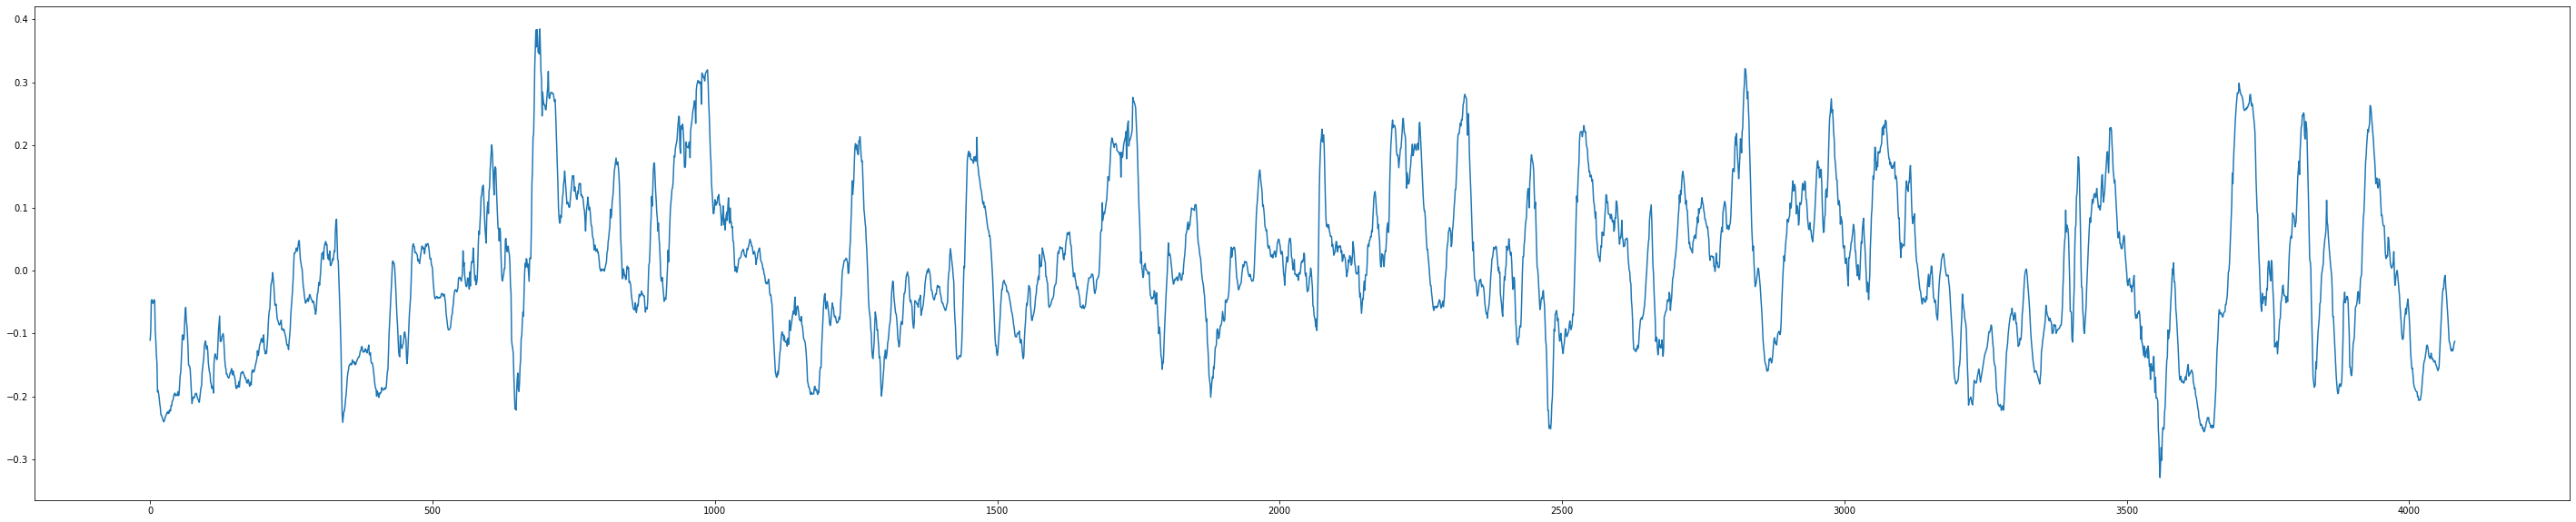

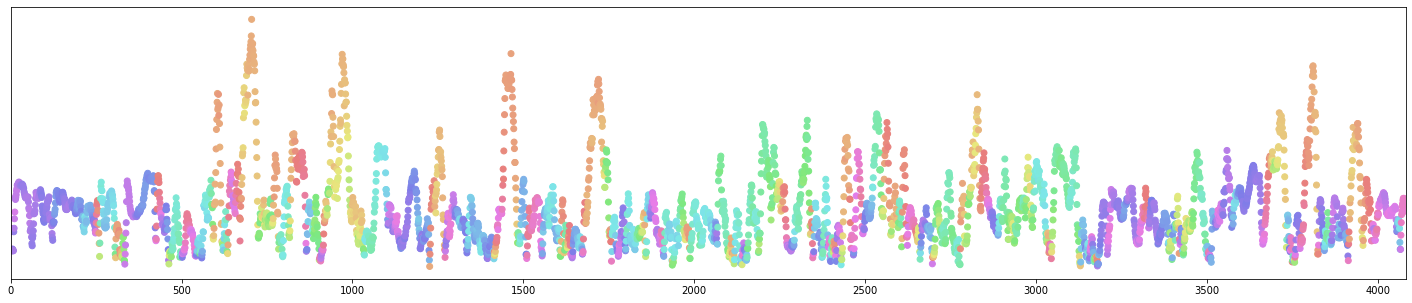

In [11]:


#plt.figure(figsize=(50,10))
#plt.plot(val)

#plt.figure(figsize=(50,10))
#plt.plot(aro)


windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']

plt.figure()
plt.hist(val, bins=100)

plt.figure()
plt.hist(aro, bins=100)

print(np.mean(val), np.mean(aro))
val = val - np.mean(val)
aro = aro - np.mean(aro)

sval = smooth(val, 11, windows[0])
saro = smooth(aro, 11, windows[0])

plt.figure(figsize=(50,10))
plt.plot(val)
plt.plot(sval)

plt.figure(figsize=(50,10))
plt.plot(sval)

plt.figure(figsize=(50,10))
plt.plot(aro)
plt.plot(saro)

plt.figure(figsize=(50,10))
plt.plot(saro)

intensity = []
color = []
for i in range(sval.shape[0]):
    inte, ang = transfer_space(sval[i], saro[i])
    intensity.append(inte)
    #print(convert_color_vector(ang))
    color.append(convert_color_vector(ang))

plt.figure(figsize=(25,5))
plt.scatter(np.arange(sval.shape[0]),intensity, c=color)
plt.xlim([0,sval.shape[0]])
plt.yticks([])
#plt.plot(intensity)

In [12]:
frame = 2500
time = (frame / 5)
minute = time // 60
second = time % 60
print(minute, second)

8.0 20.0


In [13]:

from IPython.display import HTML

HTML("""
    <video alt="test" height="500" controls>
        <source src="sample.mp4" type="video/mp4">
    </video>
""")